In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('wine_data.csv' , header = None , usecols =[0,1,2])

In [7]:
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [8]:
df.columns = ['Class label' , 'Alcohol' , 'Malic acid']

In [9]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [11]:
df.shape

(178, 3)

In [12]:
df.isna().sum()

Class label    0
Alcohol        0
Malic acid     0
dtype: int64

<AxesSubplot:>

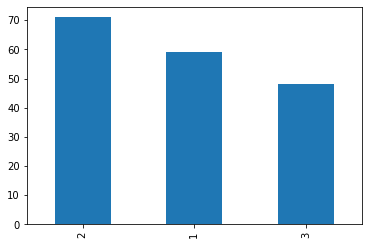

In [14]:
df['Class label'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

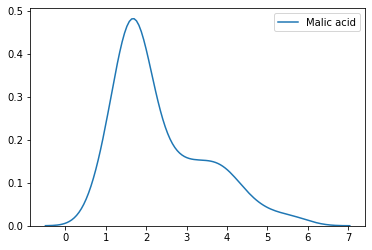

In [15]:
sns.kdeplot(df['Malic acid'])

<AxesSubplot:>

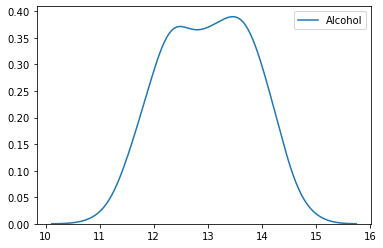

In [16]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

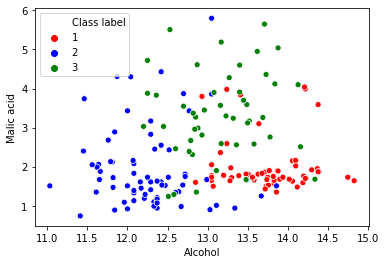

In [30]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [29]:
import plotly.express as px
px.scatter(df , x = 'Alcohol' , y ='Malic acid' , trendline = 'ols')

In [21]:
X = df.drop('Class label' , axis = 1 )
y  = df['Class label']

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)

#transform train and test data
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [32]:
X_train.head()

,Alcohol,Malic acid
169,13.40,4.60
124,11.87,4.31
54,13.74,1.67
150,13.50,3.12
40,13.56,1.71


In [33]:
X_train_scaled

array([[0.62368421, 0.76284585],
       [0.22105263, 0.7055336 ],
       [0.71315789, 0.18379447],
       [0.65      , 0.47035573],
       [0.66578947, 0.1916996 ],
       [0.72105263, 0.22924901],
       [0.62368421, 0.62648221],
       [0.35263158, 0.03952569],
       [0.39473684, 0.94268775],
       [0.27631579, 0.1284585 ],
       [0.19210526, 0.38339921],
       [0.48684211, 0.44466403],
       [0.40789474, 0.10869565],
       [0.47894737, 0.5       ],
       [0.34473684, 0.33794466],
       [0.88157895, 0.56324111],
       [0.48421053, 0.76482213],
       [0.2       , 0.27470356],
       [0.75526316, 0.18577075],
       [0.57894737, 0.50592885],
       [0.1       , 0.        ],
       [0.27631579, 0.0770751 ],
       [0.70789474, 0.13636364],
       [0.53157895, 0.61660079],
       [0.53947368, 0.62450593],
       [0.43684211, 0.15612648],
       [0.21315789, 0.02964427],
       [0.27631579, 0.11660079],
       [0.45789474, 0.53162055],
       [0.43157895, 0.04743083],
       [0.

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = ['Alcohol' , 'Malic acid'])
X_test_scaled = pd.DataFrame(X_test_scaled , columns = ['Alcohol' , 'Malic acid'])

In [39]:
np.round(X_train.describe() ,1 )

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.1
max,14.8,5.8


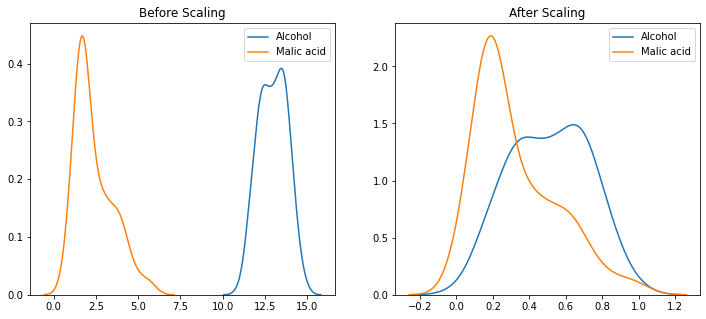

In [46]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2  , figsize = (12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'] , ax = ax1)
sns.kdeplot(X_train['Malic acid'] , ax = ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'] , ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'] , ax = ax2)
plt.show()

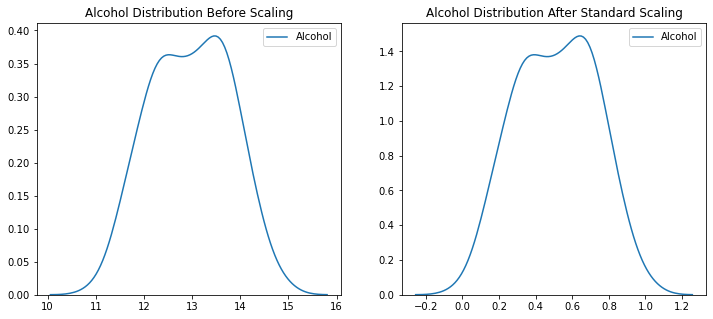

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

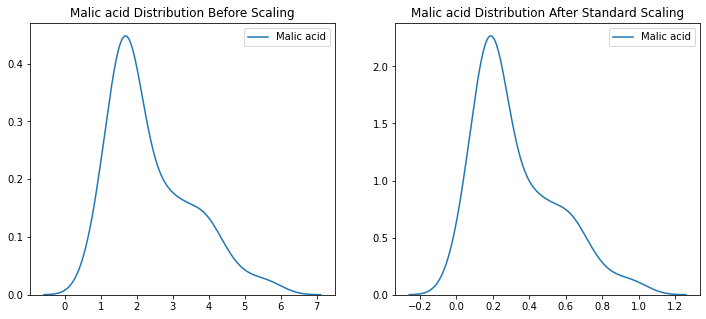

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

scaling doesn't effect distribution 